# Importing Pandas, Numpy, OS functions and matplotlib 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Making the dataframe

In [2]:
df = pd.read_csv(os.path.join('data','merged.csv'))
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.3La1.7Cu1O4


# Making a copy of the dataframe 

In [3]:
df_1 = df.copy()
df_1.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Ba0.3La1.7Cu1O4


# Making the features and the target, X and y respectively

In [4]:
X = df_1.drop(['critical_temp', 'material'], axis=1)
y = df_1['critical_temp'].values.reshape(-1,1)

# Splitting the data to test and train

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the data and testing it out

In [6]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

regressor = XGBRegressor()

regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
score_train = r2_score(y_train, y_train)

y_test_pred = regressor.predict(X_test)
score_test = r2_score(y_test, y_test_pred)
print(f'''
Train Score: {100*score_train}%
The Train score has overfitted

Test Score: {100*round(score_test,4)}%
''')


Train Score: 100.0%
The Train score has overfitted

Test Score: 92.54%



In [7]:
regressor.save_model('model_from_merged.txt')

# Creating graphs to further understand the data

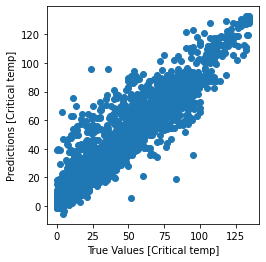

In [8]:
# y_pred = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_test_pred)
plt.xlabel('True Values [Critical temp]')
plt.ylabel('Predictions [Critical temp]')
# lims = [0, 50]
# plt.xlim(lims)
# plt.ylim(lims)
_ = plt.plot()


In [9]:
# error = y_test_pred - y_test
# plt.hist(error, bins = 25)
# plt.xlabel("Prediction Error [Critical temp]")
# _ = plt.ylabel("Count")

# This takes too long

# Testing exporting and loading the model

In [10]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

regressor = XGBRegressor()

In [11]:
# regressor.save_model('model.txt')

In [12]:
regressor.load_model('model.txt')

In [13]:
y_test_pred = regressor.predict(X_test)
score_test = r2_score(y_test, y_test_pred)

In [14]:
f'Score Test: {100*round(score_test,4)} %'

'Score Test: 92.54 %'

Exploration

In [15]:
[f'{i} : {df_1.columns.get_loc(i)}' for i in df_1.columns]

['number_of_elements : 0',
 'mean_atomic_mass : 1',
 'wtd_mean_atomic_mass : 2',
 'gmean_atomic_mass : 3',
 'wtd_gmean_atomic_mass : 4',
 'entropy_atomic_mass : 5',
 'wtd_entropy_atomic_mass : 6',
 'range_atomic_mass : 7',
 'wtd_range_atomic_mass : 8',
 'std_atomic_mass : 9',
 'wtd_std_atomic_mass : 10',
 'mean_fie : 11',
 'wtd_mean_fie : 12',
 'gmean_fie : 13',
 'wtd_gmean_fie : 14',
 'entropy_fie : 15',
 'wtd_entropy_fie : 16',
 'range_fie : 17',
 'wtd_range_fie : 18',
 'std_fie : 19',
 'wtd_std_fie : 20',
 'mean_atomic_radius : 21',
 'wtd_mean_atomic_radius : 22',
 'gmean_atomic_radius : 23',
 'wtd_gmean_atomic_radius : 24',
 'entropy_atomic_radius : 25',
 'wtd_entropy_atomic_radius : 26',
 'range_atomic_radius : 27',
 'wtd_range_atomic_radius : 28',
 'std_atomic_radius : 29',
 'wtd_std_atomic_radius : 30',
 'mean_Density : 31',
 'wtd_mean_Density : 32',
 'gmean_Density : 33',
 'wtd_gmean_Density : 34',
 'entropy_Density : 35',
 'wtd_entropy_Density : 36',
 'range_Density : 37',
 'w

In [16]:
cols_dict = dict(list(enumerate(df_1.columns)))
cols_dict

{0: 'number_of_elements',
 1: 'mean_atomic_mass',
 2: 'wtd_mean_atomic_mass',
 3: 'gmean_atomic_mass',
 4: 'wtd_gmean_atomic_mass',
 5: 'entropy_atomic_mass',
 6: 'wtd_entropy_atomic_mass',
 7: 'range_atomic_mass',
 8: 'wtd_range_atomic_mass',
 9: 'std_atomic_mass',
 10: 'wtd_std_atomic_mass',
 11: 'mean_fie',
 12: 'wtd_mean_fie',
 13: 'gmean_fie',
 14: 'wtd_gmean_fie',
 15: 'entropy_fie',
 16: 'wtd_entropy_fie',
 17: 'range_fie',
 18: 'wtd_range_fie',
 19: 'std_fie',
 20: 'wtd_std_fie',
 21: 'mean_atomic_radius',
 22: 'wtd_mean_atomic_radius',
 23: 'gmean_atomic_radius',
 24: 'wtd_gmean_atomic_radius',
 25: 'entropy_atomic_radius',
 26: 'wtd_entropy_atomic_radius',
 27: 'range_atomic_radius',
 28: 'wtd_range_atomic_radius',
 29: 'std_atomic_radius',
 30: 'wtd_std_atomic_radius',
 31: 'mean_Density',
 32: 'wtd_mean_Density',
 33: 'gmean_Density',
 34: 'wtd_gmean_Density',
 35: 'entropy_Density',
 36: 'wtd_entropy_Density',
 37: 'range_Density',
 38: 'wtd_range_Density',
 39: 'std_Densi

In [17]:
cols_ints_to_drop = np.arange(82,168)
cols_ints_to_drop

array([ 82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167])

In [18]:
cols_to_drop = [v[1] for v in cols_dict.items() if v[0] in cols_ints_to_drop]
cols_to_drop

['H',
 'He',
 'Li',
 'Be',
 'B',
 'C',
 'N',
 'O',
 'F',
 'Ne',
 'Na',
 'Mg',
 'Al',
 'Si',
 'P',
 'S',
 'Cl',
 'Ar',
 'K',
 'Ca',
 'Sc',
 'Ti',
 'V',
 'Cr',
 'Mn',
 'Fe',
 'Co',
 'Ni',
 'Cu',
 'Zn',
 'Ga',
 'Ge',
 'As',
 'Se',
 'Br',
 'Kr',
 'Rb',
 'Sr',
 'Y',
 'Zr',
 'Nb',
 'Mo',
 'Tc',
 'Ru',
 'Rh',
 'Pd',
 'Ag',
 'Cd',
 'In',
 'Sn',
 'Sb',
 'Te',
 'I',
 'Xe',
 'Cs',
 'Ba',
 'La',
 'Ce',
 'Pr',
 'Nd',
 'Pm',
 'Sm',
 'Eu',
 'Gd',
 'Tb',
 'Dy',
 'Ho',
 'Er',
 'Tm',
 'Yb',
 'Lu',
 'Hf',
 'Ta',
 'W',
 'Re',
 'Os',
 'Ir',
 'Pt',
 'Au',
 'Hg',
 'Tl',
 'Pb',
 'Bi',
 'Po',
 'At',
 'Rn']

In [19]:
df_2 = df_1.drop(cols_to_drop, axis = 1)

df_2.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp,material
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0,Ba0.2La1.8Cu1O4
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0,Ba0.1La1.9Cu1O4
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0,Ba0.15La1.85Cu1O4
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0,Ba0.3La1.7Cu1O4


In [20]:
df_2.to_csv(os.path.join('data','data_no_elements.csv'), index=False)

In [21]:
X = df_2.drop(['critical_temp', 'material'], axis=1)
y = df_2['critical_temp'].values.reshape(-1,1)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
path_data_no_elements = os.path.join('data','data_no_elements.csv')
df_data_no_elements = pd.read_csv(path_data_no_elements)


X = df_data_no_elements.drop(['critical_temp'], axis=1)
y = df_data_no_elements['critical_temp'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_no_material, X_test_no_material = X_train.drop(['material'], axis=1), X_test.drop(['material'], axis=1)

In [31]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

regressor = XGBRegressor()

regressor.fit(X_train_no_material, y_train)

y_train_pred = regressor.predict(X_train_no_material)
score_train = r2_score(y_train, y_train)

y_test_pred = regressor.predict(X_test_no_material)
score_test = r2_score(y_test, y_test_pred)
print(f'''
Test Score: {100*round(score_test,4)}%
''')


Test Score: 92.36999999999999%



In [24]:
regressor.save_model('model_from_data_no_elements.txt')

In [37]:
X_train

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,material
16546,2,77.143500,53.722300,71.372307,51.848347,0.619298,0.497747,58.553000,32.438300,29.276500,...,4.000000,4.000000,4.000000,0.693147,0.325083,0,3.200000,0.000000,0.000000,Pd0.1Ti0.9
5970,4,104.365600,71.922350,72.746865,43.369558,1.129463,1.221243,184.590600,26.332050,70.392496,...,2.000000,2.000000,2.000000,1.386294,1.207974,0,0.800000,0.000000,0.000000,Hg0.8Ba2Cu1.2O4
7542,5,74.231650,51.256952,60.515221,34.941384,1.453747,1.327852,121.327600,20.724892,39.445875,...,2.076923,2.168944,2.063362,1.594167,1.229147,1,1.064615,0.400000,0.266469,Y1Ba2Cu2.92Zn0.08O7
2157,7,88.309607,48.586910,69.138309,33.542945,1.740703,1.724444,191.200600,11.938538,57.329551,...,2.138462,2.479397,2.104979,1.908037,1.479833,2,1.030769,0.728431,0.451559,In0.2Pb0.55Sr2Ca0.5Y0.5Cu2.25O7
18265,5,69.321369,72.150027,56.104529,55.643005,1.434383,1.302362,124.908250,31.227062,40.715396,...,3.575000,3.437544,3.381939,1.567056,1.488545,3,0.950000,1.019804,1.115516,Pr1Fe0.7Co0.3As1O1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2,25.643269,25.348850,25.608325,25.315724,0.691785,0.678668,2.676539,4.303250,1.338269,...,2.390000,2.449490,2.342640,0.673012,0.692928,1,0.050000,0.500000,0.487750,Al0.39Mg0.61
11964,4,144.041845,128.014563,135.218871,120.611379,1.325694,1.318069,102.177620,32.495603,49.630753,...,5.833333,5.732657,5.820421,1.383370,1.224634,1,2.166667,0.433013,0.372678,Ir1Mo3Nb1Pt1
5390,5,95.509280,56.977188,73.307186,36.853454,1.419515,1.484104,157.054600,14.484329,55.077433,...,2.078431,2.168944,2.064624,1.594167,1.287474,1,0.996078,0.400000,0.268849,Ba1.6Sr0.4Yb1Cu3O6.75
860,4,92.505350,60.961000,68.030395,36.899835,1.172035,0.995372,134.360600,36.735514,55.465617,...,2.307143,2.632148,2.259535,1.342113,1.096043,2,1.057143,0.829156,0.505632,Sm1.85Ce0.15Cu1O4


In [45]:
X_test_copy = X_test.copy()
X_test_copy.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,material
13976,2,82.768190,87.837285,82.144935,87.360109,0.685627,0.509575,20.27638,51.522285,10.138190,...,4.750000,4.472136,4.728708,0.686962,0.514653,1,2.750000,0.500000,0.433013,Ge1Nb3
1710,4,76.444563,81.456750,59.356672,68.229617,1.199541,1.108189,121.32760,36.950657,43.823354,...,2.142857,2.213364,2.119268,1.368922,1.309526,1,0.571429,0.433013,0.349927,Y1Ba2Cu3O
369,5,88.936744,51.090431,70.358975,34.783991,1.445824,1.525092,122.90607,10.438667,46.482335,...,2.114679,2.352158,2.095193,1.589027,1.314189,1,0.967890,0.489898,0.318634,Y1Ba1.5La0.5Cu3O7.08
1698,4,76.517718,56.149432,59.310096,35.562124,1.197273,1.042132,122.90607,31.920690,44.289459,...,2.251429,2.213364,2.214646,1.368922,1.078855,1,1.074286,0.433013,0.433834,La1.76Sr0.24Cu1O4
13540,3,104.608490,89.558979,101.719818,88.481210,1.070258,0.944284,59.94547,33.541423,25.225148,...,5.811245,4.762203,5.743954,1.054920,0.803990,3,3.024096,1.414214,0.728448,La0.94Mo6Se8


In [54]:
w = X_test_copy.reset_index()
w.head()

,index,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,material
0,13976,2,82.768190,87.837285,82.144935,87.360109,0.685627,0.509575,20.27638,51.522285,...,4.750000,4.472136,4.728708,0.686962,0.514653,1,2.750000,0.500000,0.433013,Ge1Nb3
1,1710,4,76.444563,81.456750,59.356672,68.229617,1.199541,1.108189,121.32760,36.950657,...,2.142857,2.213364,2.119268,1.368922,1.309526,1,0.571429,0.433013,0.349927,Y1Ba2Cu3O
2,369,5,88.936744,51.090431,70.358975,34.783991,1.445824,1.525092,122.90607,10.438667,...,2.114679,2.352158,2.095193,1.589027,1.314189,1,0.967890,0.489898,0.318634,Y1Ba1.5La0.5Cu3O7.08
3,1698,4,76.517718,56.149432,59.310096,35.562124,1.197273,1.042132,122.90607,31.920690,...,2.251429,2.213364,2.214646,1.368922,1.078855,1,1.074286,0.433013,0.433834,La1.76Sr0.24Cu1O4
4,13540,3,104.608490,89.558979,101.719818,88.481210,1.070258,0.944284,59.94547,33.541423,...,5.811245,4.762203,5.743954,1.054920,0.803990,3,3.024096,1.414214,0.728448,La0.94Mo6Se8


In [52]:
materia = 'Ge1Nb3'
materia

'Ge1Nb3'

In [56]:
q = w[w.material == materia].number_of_elements
q

0       2
16      2
1409    2
3060    2
Name: number_of_elements, dtype: int64

In [68]:
y_test_pred_proto = regressor.predict(X_test_no_material)

y_test_pred = y_test_pred_proto
y_test_pred

array([ 8.585287 , 86.14683  , 28.127224 , ...,  4.800669 , 11.430266 ,
        2.2474623], dtype=float32)

In [69]:
y_test_pred[w[w.material == materia].index]

array([8.585287, 8.585287, 8.585287, 8.585287], dtype=float32)

In [83]:
np.array(y_test).ravel()

array([ 6.4 , 91.2 , 38.  , ...,  3.5 ,  8.7 ,  2.15])

In [80]:
y_test[w[w.material == materia].index]

array([[ 6.4  ],
       [21.8  ],
       [22.1  ],
       [ 3.342]])